# 3.0-Normalization and Embedding 

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-09"

## Introduction

Normalize data and create embeddings for the each time point fraction

In [2]:
timepoint <- "T6"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(tidyverse)
library(grid)
library(gridExtra)
library(ggplot2)
library(scater) 
library(scran)
}))

## Parameters

In [4]:
#here::dr_here(show_reason = TRUE)
source(here::here("SCGRES_105_106/sc_analysis/misc/paths.R"))

"{clust}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{clust}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
seurat_obj <- readRDS(here::here(glue::glue("{qc}/{robj_dir}/clean_combined_object_{timepoint}.rds")))

In [6]:
head(seurat_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_org,timepoint,replicate,sample_id,pct_mt,percent.ribo,doublet_score,doublet_pred
,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
T6_1_AAACCTGAGAATGTGT-1,SCGRES_105_106,3417,1730,OS0075_1,T6,1,T6_1,2.721686,12.730465,0.02323302,FALSE
T6_1_AAACCTGAGAGGACGG-1,SCGRES_105_106,7725,2726,OS0075_1,T6,1,T6_1,2.627832,28.660194,0.06380824,FALSE
T6_1_AAACCTGAGAGGTTAT-1,SCGRES_105_106,4382,2129,OS0075_1,T6,1,T6_1,1.688727,13.646737,0.04568528,FALSE
T6_1_AAACCTGAGATAGCAT-1,SCGRES_105_106,12552,3452,OS0075_1,T6,1,T6_1,1.681007,5.799873,0.10079328,FALSE
T6_1_AAACCTGAGATGTGGC-1,SCGRES_105_106,2838,1566,OS0075_1,T6,1,T6_1,1.585624,11.733615,0.03327941,FALSE
T6_1_AAACCTGAGCAGCCTC-1,SCGRES_105_106,4749,2146,OS0075_1,T6,1,T6_1,2.274163,15.161087,0.04284581,FALSE


## Normalization and linear dimensional reduction

In [7]:
seurat_obj <- NormalizeData(
  seurat_obj,
  normalization.method = "LogNormalize",
  scale.factor = 1e4
)

In [8]:
sce <- as.SingleCellExperiment(seurat_obj)
sce

class: SingleCellExperiment 
dim: 30930 30903 
metadata(0):
assays(2): counts logcounts
rownames(30930): OR4F5 AL627309.1 ... AC136616.2 AC023491.2
rowData names(0):
colnames(30903): T6_1_AAACCTGAGAATGTGT-1 T6_1_AAACCTGAGAGGACGG-1 ...
  T6_2_TTTGTCATCTGCTGCT-1 T6_2_TTTGTCATCTGTCCGT-1
colData names(12): orig.ident nCount_RNA ... doublet_pred ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


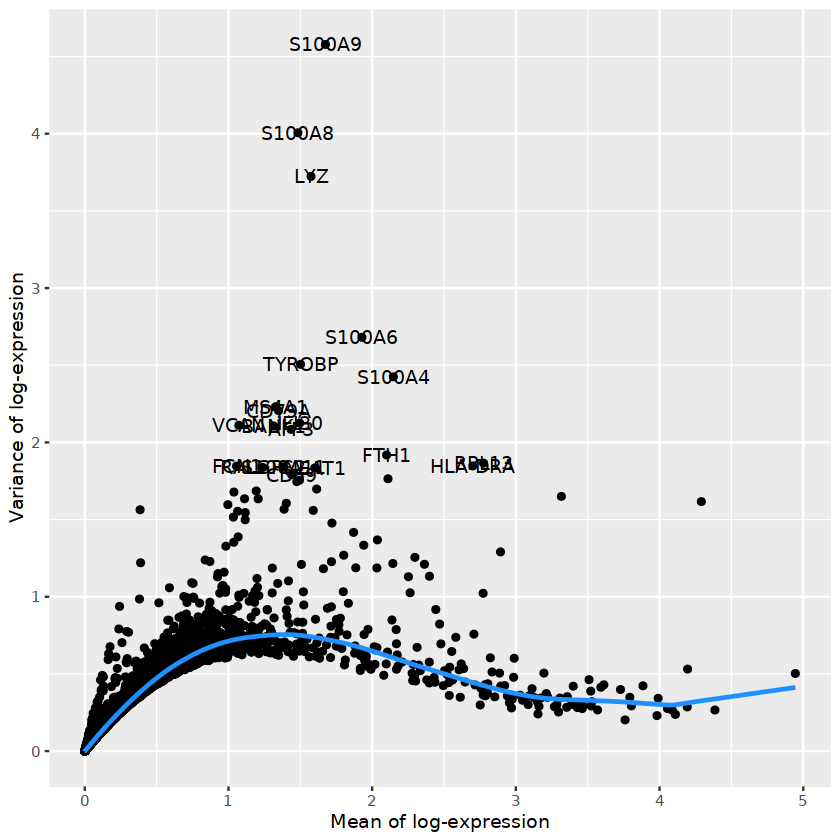

In [9]:
gene_var <- modelGeneVar(sce)

tops <- gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

gene_var %>% 
  as.data.frame() %>% 
  ggplot(aes(mean, total)) +
  geom_point() +
  geom_line(aes(y = tech), colour = "dodgerblue", size = 1) +
  labs(x = "Mean of log-expression", y = "Variance of log-expression")+
  geom_text(data=tops, aes(mean,total,label=rownames(tops)))

In [10]:
gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

,mean,total,tech,bio,p.value,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S100A9,1.674609,4.578242,0.7249463,3.853296,1.474132e-180,4.513201e-176
S100A8,1.483391,4.005855,0.7511905,3.254664,9.493930e-121,1.453331e-116
LYZ,1.574708,3.723334,0.7409076,2.982427,1.546600e-104,1.578357e-100
S100A6,1.928792,2.680697,0.6687063,2.011990,2.300213e-59,7.042331e-56
TYROBP,1.501641,2.506049,0.7495918,1.756457,8.103488e-37,5.907057e-34
S100A4,2.147754,2.424946,0.6037964,1.821149,1.203504e-59,4.094054e-56
MS4A1,1.327942,2.230827,0.7532944,1.477532,2.176915e-26,8.769530e-24
CD79A,1.348540,2.206328,0.7542038,1.452125,1.692442e-25,6.729326e-23
IFI30,1.495582,2.124883,0.7501616,1.374721,2.796541e-23,9.620100e-21


In [11]:
hvgs <- getTopHVGs(gene_var,fdr.threshold = 0.1)
length(hvgs)

[1] 482

In [12]:
hvgs

[1] "S100A9"       "S100A8"       "LYZ"          "S100A6"       "S100A4"      
  [6] "TYROBP"       "MS4A1"        "CD79A"        "RPL13"        "HLA-DRA"     
 [11] "VCAN"         "IFI30"        "BANK1"        "AFF3"         "FTL"         
 [16] "FTH1"         "CD74"         "GNLY"         "PSAP"         "FCN1"        
 [21] "NEAT1"        "RALGPS2"      "S100A11"      "CD69"         "SAT1"        
 [26] "S100A10"      "VIM"          "AIF1"         "FCER1G"       "BACH2"       
 [31] "FOS"          "LGALS1"       "TCL1A"        "HLA-DQA1"     "NKG7"        
 [36] "IGHM"         "IFITM3"       "SRGN"         "ANXA1"        "FCRL1"       
 [41] "IFITM1"       "CTSS"         "CRIP1"        "HLA-DPA1"     "HLA-DRB1"    
 [46] "IGKV3-20"     "ZFP36"        "HLA-DPB1"     "ARHGAP26"     "NAMPT"       
 [51] "LST1"         "CD52"         "IL32"         "AHNAK"        "MTRNR2L12"   
 [56] "PLXDC2"       "ZEB2"         "GAPDH"        "EBF1"         "MT-ND6"      
 [61] "IGHV3-23"     "S100A12"      "ITGB2"        "HLA-DQB1"     "IGLV2-14"    
 [66] "THBS1"        "CTSW"         "SERPINA1"     "MNDA"         "DPYD"        
 [71] "CD37"         "CCL5"         "CD79B"        "AOAH"         "PFN1"        
 [76] "IGHV4-34"     "TSPO"         "SAMHD1"       "PRF1"         "IGKV4-1"     
 [81] "SLC8A1"       "SH3BGRL3"     "CST3"         "GZMB"         "NIBAN3"      
 [86] "PAX5"         "MS4A6A"       "IGKV1-5"      "IGKV3-11"     "IGHV1-2"     
 [91] "CD14"         "SKAP1"        "TXNIP"        "RPSA"         "GZMA"        
 [96] "CD7"          "CD247"        "IGHV3-30"     "FCGR3A"       "IGHV4-39"    
[101] "IGHV3-21"     "IGKC"         "CST7"         "IGHV4-59"     "IL2RB"       
[106] "IGHV3-7"      "CD3E"         "RPLP0"        "JCHAIN"       "IGKV3-15"    
[111] "PRKCH"        "IGHV3-15"     "IL1B"         "ACTB"         "KLRD1"       
[116] "IL7R"         "IGHV3-33"     "IGLV2-23"     "CXCL8"        "IGLV2-11"    
[121] "AREG"         "IGLV3-21"     "IGHV1-18"     "IGHV5-51"     "IGLV1-40"    
[126] "IGLV1-51"     "IGHV3-11"     "IGKV1-17"     "IGLV2-8"      "IGHV2-5"     
[131] "IGLV3-19"     "IGLV3-1"      "IGLV1-44"     "SOX5"         "CCL4"        
[136] "KLRB1"        "IFI27"        "SPON2"        "IGLV1-47"     "KLRK1"       
[141] "CD3D"         "PPBP"         "GZMH"         "PTGDS"        "IGHA1"       
[146] "FGFBP2"       "IGKV1-8"      "GZMK"         "ADGRG1"       "IL1R2"       
[151] "TXK"          "NCAM1"        "AC233755.2"   "LEF1"         "HOPX"        
[156] "LINC01505"    "IGKV1-27"     "NCALD"        "ITK"          "IGHV1-3"     
[161] "TOX"          "IGHV4-31"     "IGHV3-74"     "AL589693.1"   "IGLV4-69"    
[166] "IGHV3-48"     "IGHV4-61"     "INPP4B"       "KLRF1"        "HBB"         
[171] "IGLV3-25"     "IGKV2-24"     "IGHV2-26"     "IGKV2-30"     "IGHV6-1"     
[176] "KLRC1"        "TGFBR3"       "IGKV1-9"      "IGKV1-16"     "CAMK4"       
[181] "TCL1B"        "IGHV3-13"     "IGLV6-57"     "XCL1"         "IGHV1-46"    
[186] "TUBB1"        "AQP3"         "G0S2"         "IGHG1"        "IGKV1D-8"    
[191] "IGLV5-45"     "IGLV3-10"     "THEMIS"       "IGHV4-4"      "IGHV3-49"    
[196] "TRBV20-1"     "C1QB"         "IGHV3-53"     "XCL2"         "PF4"         
[201] "IGHA2"        "IGLV9-49"     "IGHV1-24"     "IGKV2D-29"    "KIR3DL1"     
[206] "IGLV8-61"     "IGLV7-46"     "FCER1A"       "AL136456.1"   "KLRC2"       
[211] "DTHD1"        "IGHV3-73"     "IGHV3-64"     "TRBV5-1"      "IGLV7-43"    
[216] "IGLV3-27"     "IGHV3-20"     "C1QA"         "IGHV3-72"     "IGLV4-60"    
[221] "MPIG6B"       "KIR2DL4"      "FOXP3"        "CD8B"         "IGHV7-4-1"   
[226] "LINC02694"    "IGHV2-70"     "IGLV1-36"     "IGHV3-43"     "LINGO2"      
[231] "IGHG3"        "TRBV7-9"      "C1QC"         "CD8A"         "IGLVI-70"    
[236] "IGKV5-2"      "BNC2"         "HIST1H1B"     "KIR2DL1"      "TRBV18"      
[241] "IGLV3-16"     "IGKV1-6"      "MKI67"        "KIR2DL3"      "TRBV10-3"    
[246] "TRBV19"       "RRM2"      

In [13]:
# remove TCR genes
hvgs <- hvgs[!grepl("^TR[ABDG][VJC]", hvgs)]

# remove BCR genes
hvgs <- hvgs[!grepl("^IG[HKL]V", hvgs)]
hvgs <- hvgs[!grepl("^IG[HKL]J", hvgs)]
hvgs <- hvgs[!grepl("^IG[KL]C", hvgs)]
hvgs <- hvgs[!grepl("^IGH[ADEGM]", hvgs)]
length(hvgs)

[1] 258

In [14]:
list_objects = SplitObject(seurat_obj,  split.by = "sample_id")

In [15]:
seurat_obj <- seurat_obj %>%
  ScaleData(features=hvgs) %>% 
  RunPCA(features=hvgs)

Centering and scaling data matrix

PC_ 1 
Positive:  TYROBP, LYZ, S100A11, S100A9, FCN1, S100A6, AIF1, S100A8, VCAN, PLXDC2 
	   FCER1G, LGALS1, S100A4, MNDA, ANXA1, IFI30, ARHGAP26, SERPINA1, NEAT1, S100A10 
	   SRGN, LST1, NAMPT, FTL, CST3, TSPO, SLC8A1, PSAP, MS4A6A, SAT1 
Negative:  CD79A, MS4A1, AFF3, CD69, BANK1, RALGPS2, FCRL1, BACH2, CD79B, TCL1A 
	   EBF1, PAX5, NIBAN3, RPSA, CD52, HLA-DQA1, CD37, RPLP0, MT-ND6, TXNIP 
	   CD74, HLA-DPB1, JCHAIN, HLA-DPA1, SKAP1, HLA-DRA, SOX5, HLA-DQB1, IFITM1, TCL1B 
PC_ 2 
Positive:  NKG7, CTSW, PRF1, GNLY, CD247, CD7, CST7, GZMA, IL2RB, KLRD1 
	   PRKCH, GZMB, CCL5, TXK, KLRF1, HOPX, IL32, ADGRG1, NCALD, TGFBR3 
	   KLRB1, KLRK1, GZMH, IFITM1, FGFBP2, SPON2, NCAM1, KLRC1, SKAP1, TOX 
Negative:  HLA-DRA, HLA-DRB1, CD74, HLA-DQB1, HLA-DPB1, HLA-DPA1, HLA-DQA1, CD37, MS4A1, BANK1 
	   CD79A, RALGPS2, FCRL1, AFF3, TCL1A, EBF1, CD79B, PAX5, IFI30, NIBAN3 
	   CTSS, FTL, LST1, LYZ, FCN1, RPLP0, S100A9, MS4A6A, AIF1, SAT1 
PC_ 3 
Positive:  GZMB,

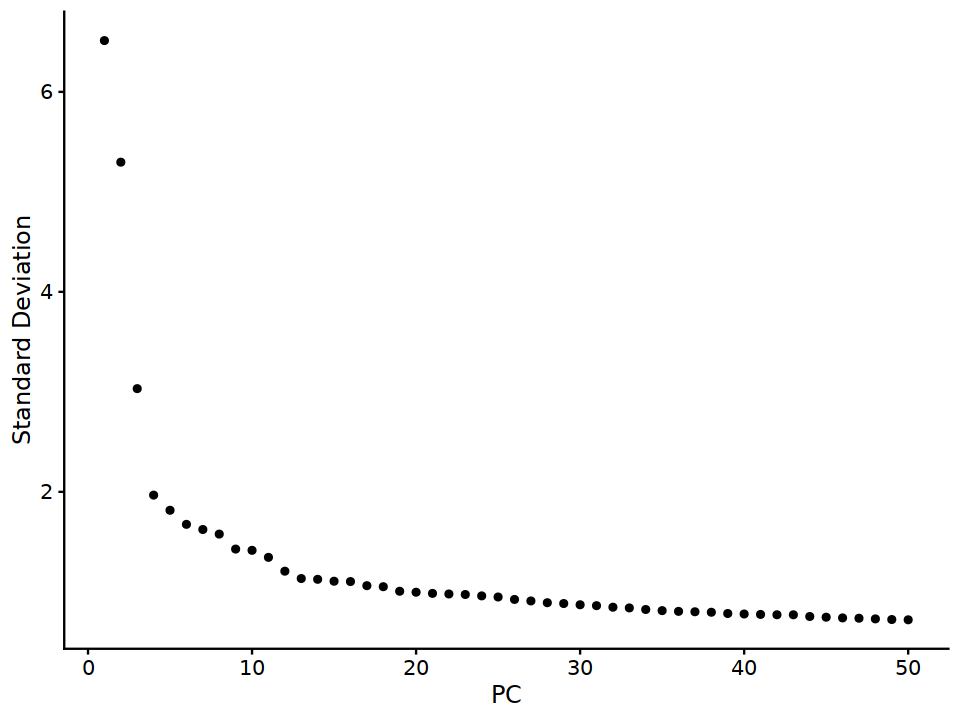

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6)
ElbowPlot(seurat_obj, n=50)

In [17]:
ProjectDim(seurat_obj, reduction = "pca")

PC_ 1 
Positive:  TYROBP, LYZ, S100A11, S100A9, FCN1, S100A6, AIF1, S100A8, VCAN, PLXDC2 
	   FCER1G, LGALS1, S100A4, MNDA, ANXA1, IFI30, ARHGAP26, SERPINA1, NEAT1, S100A10 
Negative:  CD79A, MS4A1, AFF3, CD69, BANK1, RALGPS2, FCRL1, BACH2, CD79B, TCL1A 
	   EBF1, PAX5, NIBAN3, RPSA, CD52, HLA-DQA1, CD37, RPLP0, MT-ND6, TXNIP 
PC_ 2 
Positive:  NKG7, CTSW, PRF1, GNLY, CD247, CD7, CST7, GZMA, IL2RB, KLRD1 
	   PRKCH, GZMB, CCL5, TXK, KLRF1, HOPX, IL32, ADGRG1, NCALD, TGFBR3 
Negative:  HLA-DRA, HLA-DRB1, CD74, HLA-DQB1, HLA-DPB1, HLA-DPA1, HLA-DQA1, CD37, MS4A1, BANK1 
	   CD79A, RALGPS2, FCRL1, AFF3, TCL1A, EBF1, CD79B, PAX5, IFI30, NIBAN3 
PC_ 3 
Positive:  GZMB, CD74, HLA-DRA, GNLY, ADGRG1, ZEB2, HLA-DRB1, KLRD1, HLA-DPA1, KLRF1 
	   FGFBP2, HLA-DPB1, NKG7, PRF1, HLA-DQB1, FCGR3A, SPON2, HOPX, CCL4, CST7 
Negative:  CD3E, CD3D, CAMK4, AQP3, IL7R, LEF1, INPP4B, THEMIS, ITK, IL32 
	   FOXP3, LINC02694, AL136456.1, TOX, IFITM1, SKAP1, CD8B, PRKCH, RPLP0, S100A10 
PC_ 4 
Positive:  FGFBP

An object of class Seurat 
30930 features across 30903 samples within 1 assay 
Active assay: RNA (30930 features, 0 variable features)
 1 dimensional reduction calculated: pca

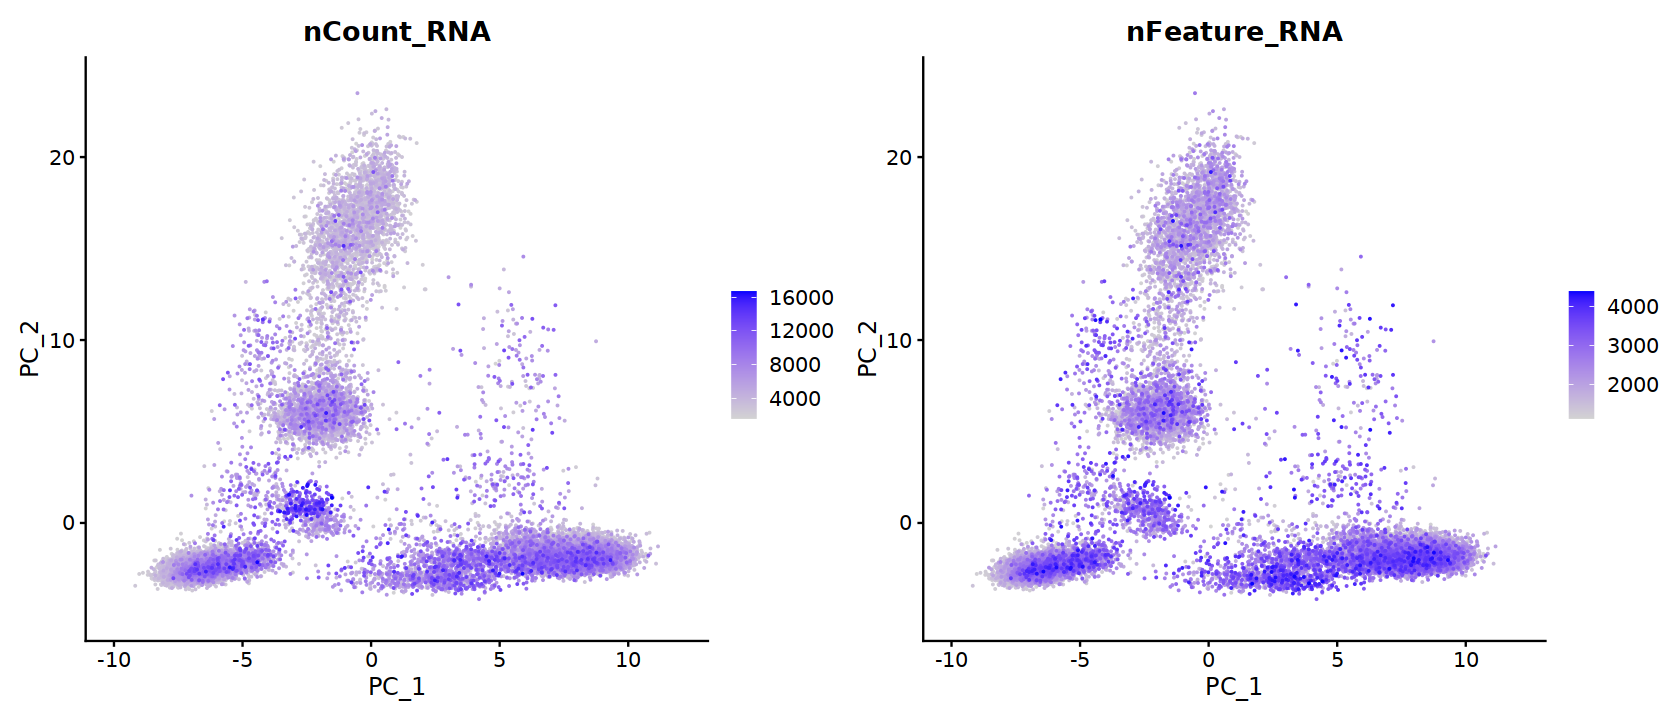

In [18]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("nCount_RNA","nFeature_RNA"), order=T)

## UMAP representation

In [19]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = 1:15,
  reduction = "pca",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:32:44 UMAP embedding parameters a = 0.9922 b = 1.112

12:32:44 Read 30903 rows and found 15 numeric columns

12:32:44 Using Annoy for neighbor search, n_neighbors = 30

12:32:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:32:48 Writing NN index file to temp file /scratch_tmp/33937378/RtmpQHQS68/file25cd8359be3ad

12:32:48 Searching Annoy index using 1 thread, search_k = 3000

12:33:01 Annoy recall = 100%

12:33:02 Commencing smooth kNN distance calibration using 1 thread
 with t

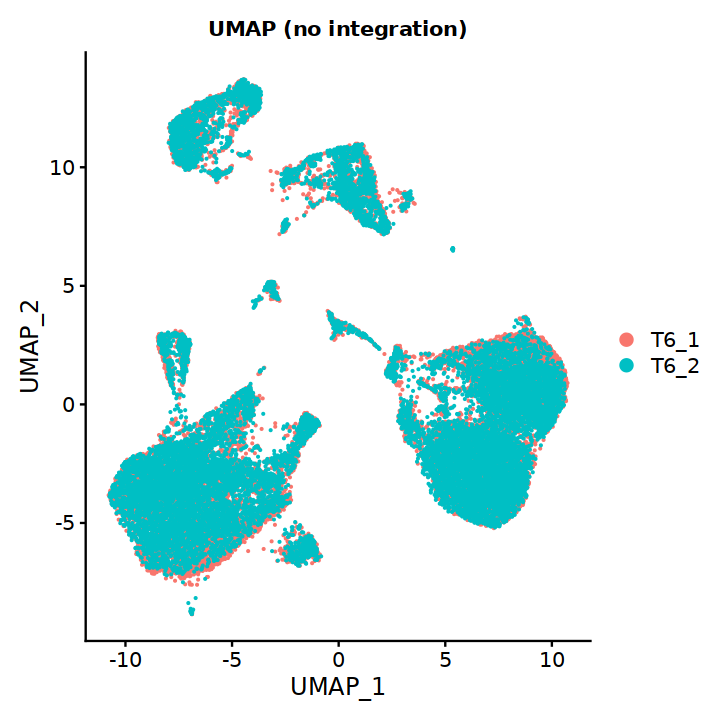

In [20]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  pt.size = 0.1
) + ggtitle('UMAP (no integration)') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

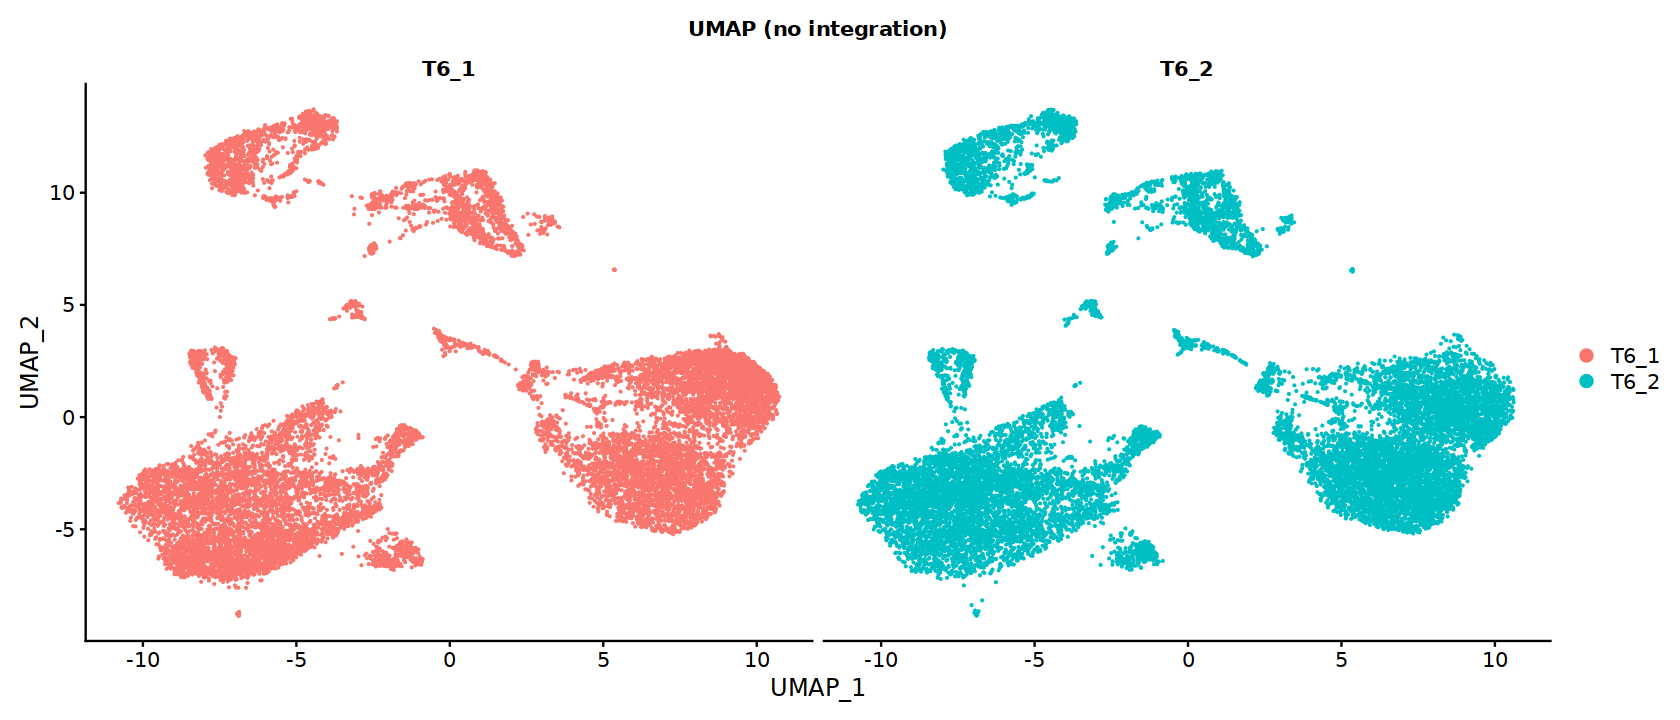

In [21]:
options(repr.plot.width = 14, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  split.by = "sample_id",
  pt.size = 0.1
) + ggtitle('UMAP (no integration)') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## More quality checks on UMAPs

### Compute Cell-Cycle Scores

In [22]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
seurat_obj <- CellCycleScoring(seurat_obj, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

### Plot several features

In [23]:
cat_vars <-c("Phase")
con_vars <- c("nCount_RNA", "nFeature_RNA", "pct_mt", "percent.ribo", 
              "doublet_score", "PTPRC", "HBM")
vars <- c(cat_vars, con_vars)

In [24]:
# compute plots
list_plots <- lapply(vars, function(var){
  if (var %in% cat_vars) {
      p <- DimPlot(seurat_obj, reduction = "umap", group.by=var)
  } else {
      p <- FeaturePlot(seurat_obj, reduction = "umap", feature=var, order = TRUE)
  }
  return(p)
})

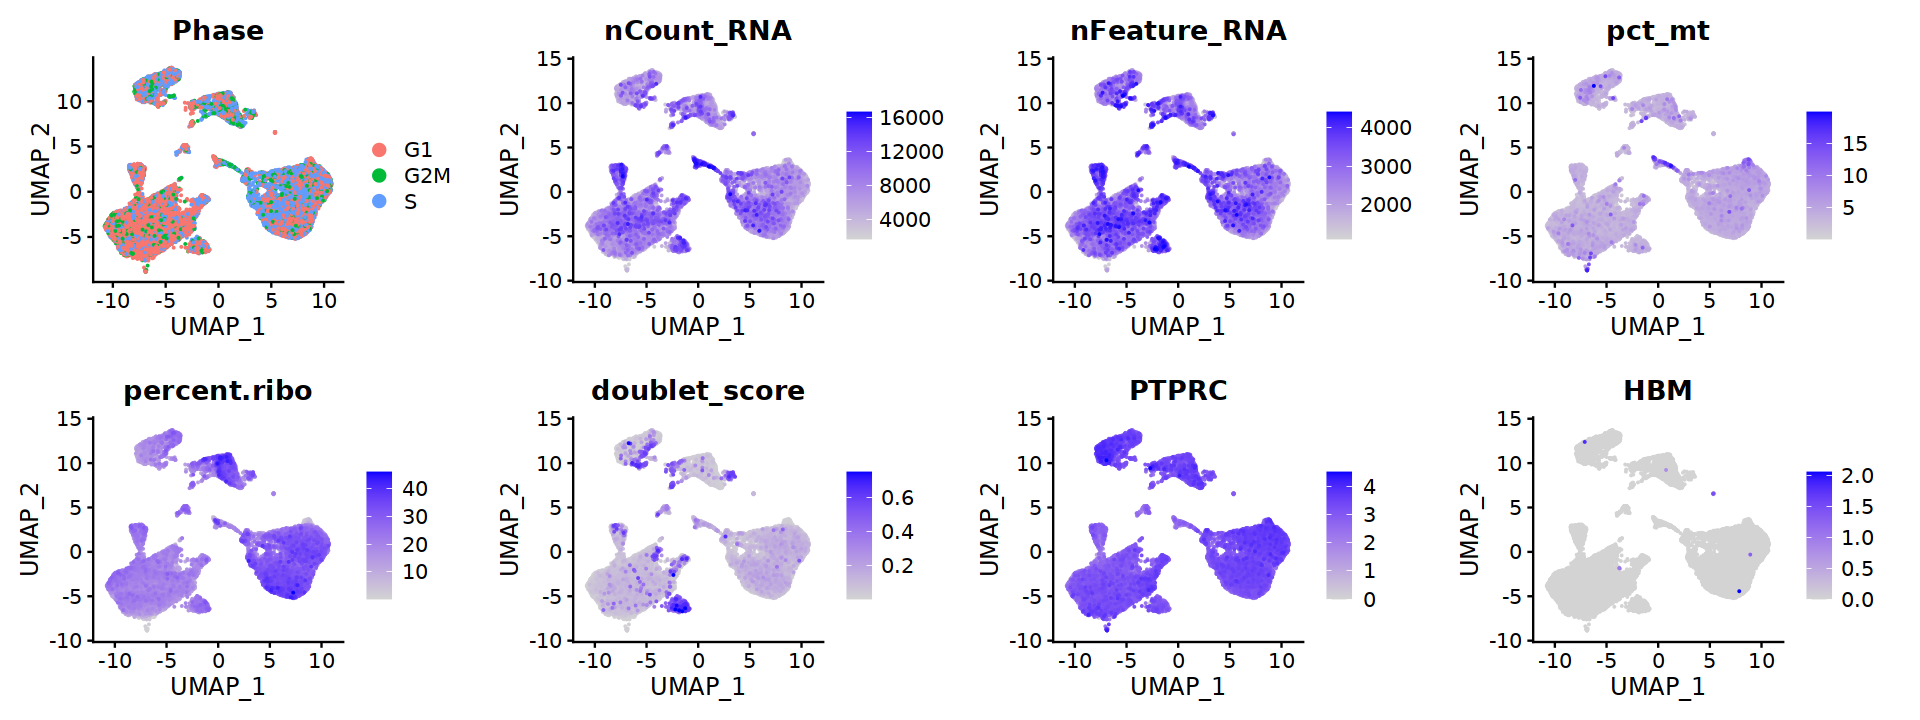

In [25]:
options(repr.plot.width = 16, repr.plot.height = 6, warn=-1,verbose = FALSE)
# show plots
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol = 4,
                   nrow = 2)
cp

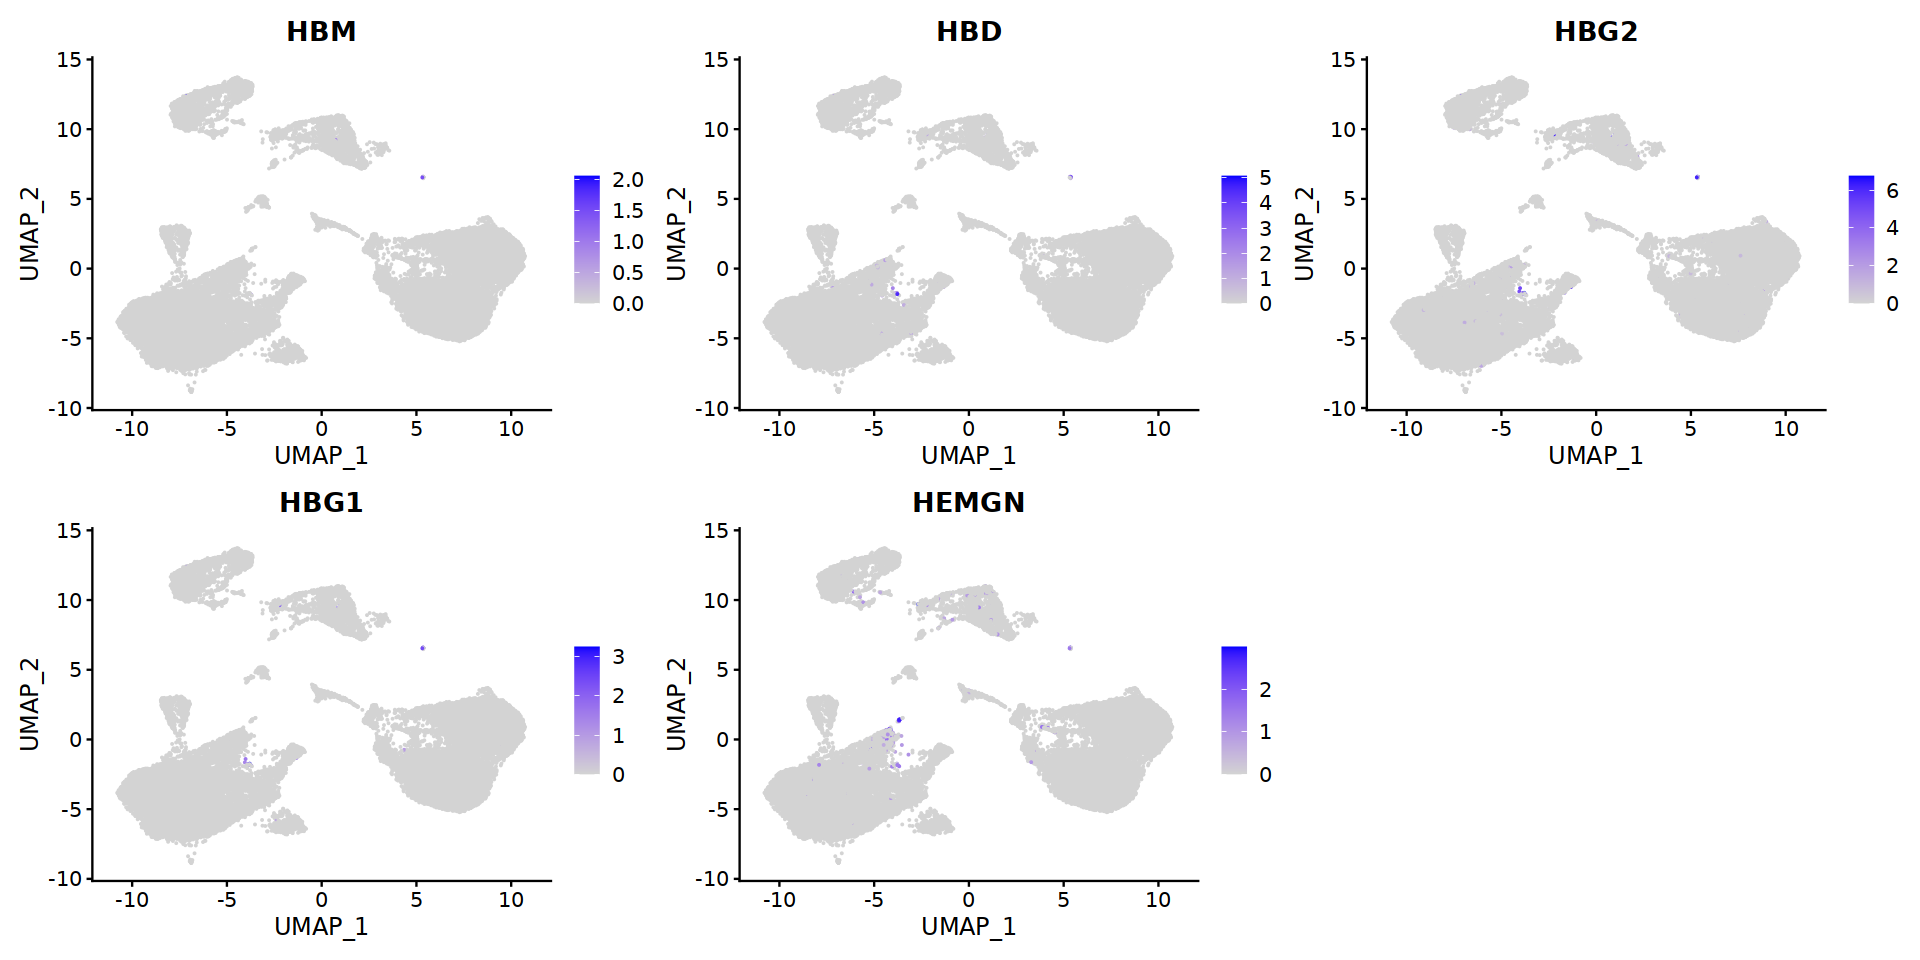

In [26]:
options(repr.plot.width = 16, repr.plot.height = 8, warn=-1,verbose = FALSE)
hemo_genes = c("HBM", "HBD", "HBG2","HBG1", "HEMGN")

FeaturePlot(seurat_obj, reduction = "umap", feature=hemo_genes, order = FALSE, ncol=3)

HVGs reveals lots of B-cells

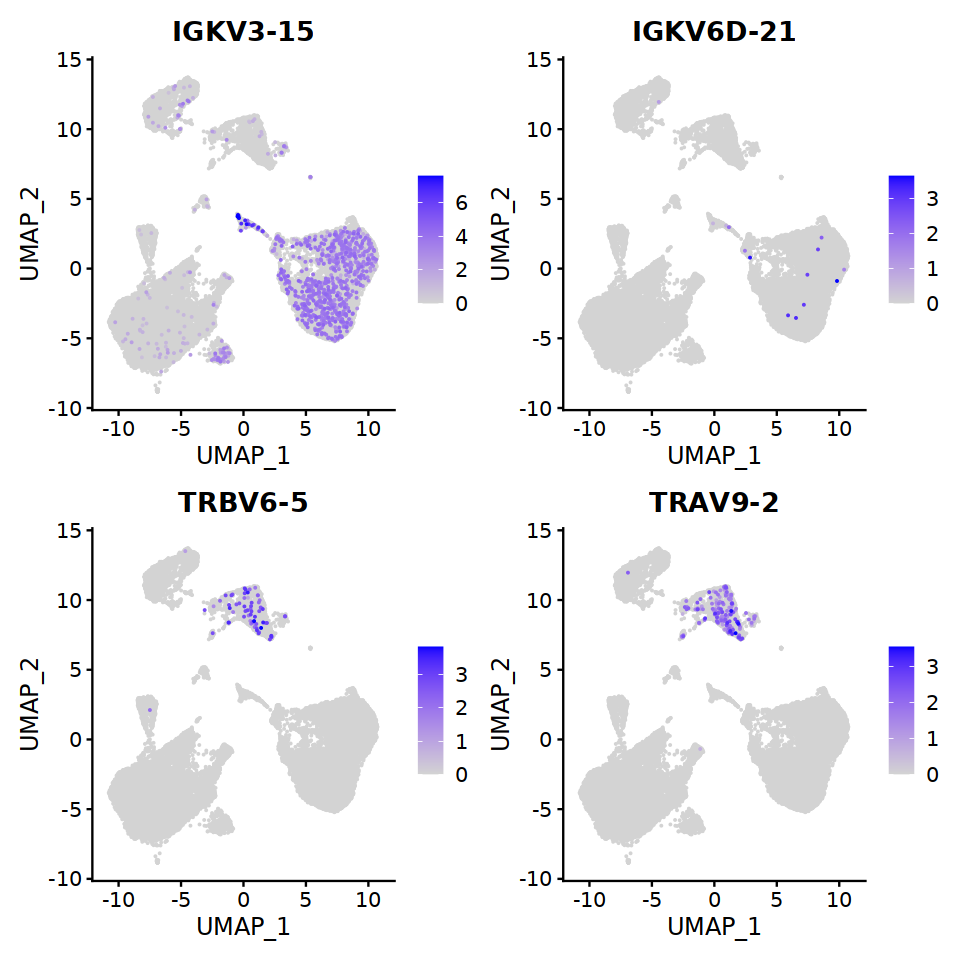

In [27]:
options(repr.plot.width = 8, repr.plot.height = 8, warn=-1,verbose = FALSE)
other_genes = c("IGKV3-15", "IGKV6D-21", 
                "TRBV6-5", "TRAV9-2")

FeaturePlot(seurat_obj, reduction = "umap", 
            feature=other_genes, order = TRUE, ncol=2)

# Save

In [ ]:
saveRDS(seurat_obj, here::here(glue::glue("{clust}/{robj_dir}/dimred_combined_object_{timepoint}.rds")))

# Session Info

In [ ]:
sessionInfo()